# Laboratorio 4
### Isabel Ortiz Naranjo
### Carné: 18176

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [7]:
dt = pd.read_csv("insurance.csv")

In [8]:
dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


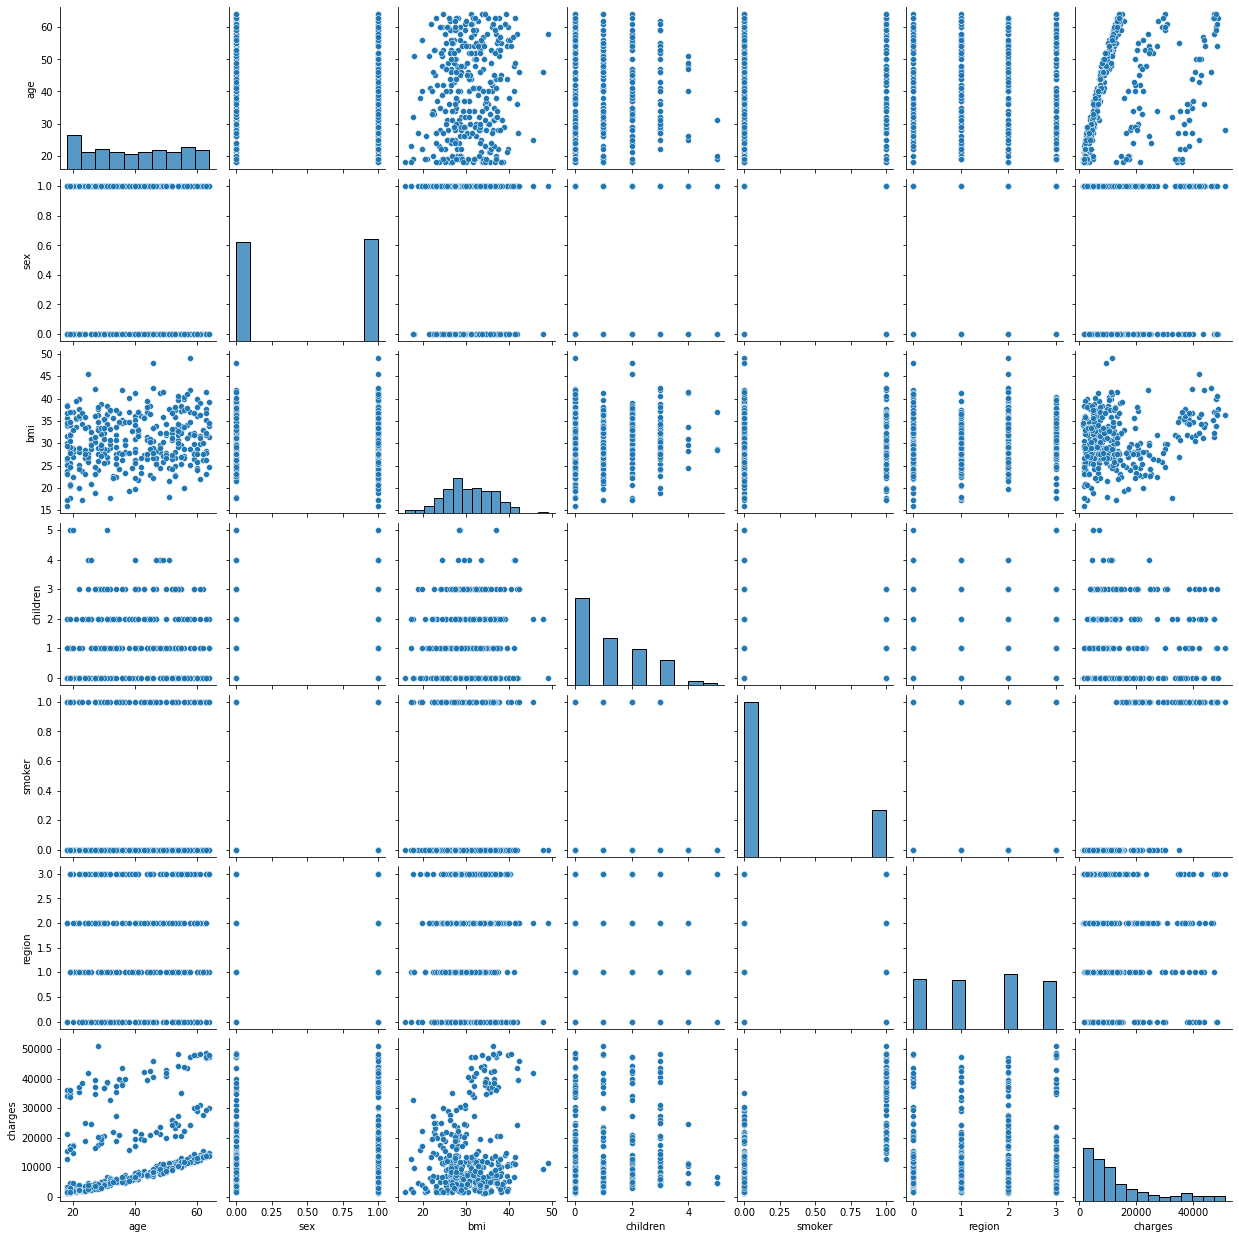

In [9]:
sb.pairplot(dt)

In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


In [11]:
dt.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


In [12]:
dt.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
343,False,False,False,False,False,False,False
344,False,False,False,False,False,False,False
345,False,False,False,False,False,False,False
346,False,False,False,False,False,False,False


### Según lo aprendido en los labs anteriores

In [21]:
from sklearn import preprocessing

In [22]:
label_encoder = preprocessing.LabelEncoder()

In [23]:
dt['smoker']= label_encoder.fit_transform(dt['smoker'])

In [24]:
dt['smoker'].head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [25]:
dt['smoker'].unique()

array([1, 0], dtype=int64)

In [26]:
dt['sex'] = label_encoder.fit_transform(dt['sex'])

In [27]:
dt['sex'].unique()

array([0, 1], dtype=int64)

In [28]:
dt['sex'].head()

0    0
1    1
2    1
3    1
4    1
Name: sex, dtype: int64

In [29]:
dt['region'].head

<bound method NDFrame.head of 0      3
1      2
2      2
3      1
4      1
      ..
343    0
344    2
345    2
346    2
347    0
Name: region, Length: 348, dtype: int64>

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder',
                                        OneHotEncoder(),
                                        [0])],
                                      remainder='passthrough')

In [33]:
# Separando los datos
target=dt['charges']
data=dt.drop(columns=['charges'])

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit_transform(data)

In [35]:
data

array([[-1.43036576, -1.01739261, -0.49424524, -0.91737141,  1.81557052,
         1.36314909],
       [-1.49982813,  0.98290472,  0.550655  , -0.07725233, -0.55079106,
         0.45612063],
       [-0.80520451,  0.98290472,  0.41358972,  1.60298584, -0.55079106,
         0.45612063],
       ...,
       [-0.38843033, -1.01739261, -0.25215592,  1.60298584, -0.55079106,
         0.45612063],
       [-0.4578927 ,  0.98290472,  0.90310857,  0.76286675, -0.55079106,
         0.45612063],
       [ 0.44511801,  0.98290472,  0.47500209, -0.07725233, -0.55079106,
        -1.35793628]])

In [36]:
print(data,target)

[[-1.43036576 -1.01739261 -0.49424524 -0.91737141  1.81557052  1.36314909]
 [-1.49982813  0.98290472  0.550655   -0.07725233 -0.55079106  0.45612063]
 [-0.80520451  0.98290472  0.41358972  1.60298584 -0.55079106  0.45612063]
 ...
 [-0.38843033 -1.01739261 -0.25215592  1.60298584 -0.55079106  0.45612063]
 [-0.4578927   0.98290472  0.90310857  0.76286675 -0.55079106  0.45612063]
 [ 0.44511801  0.98290472  0.47500209 -0.07725233 -0.55079106 -1.35793628]] 0      16884.92400
1       1725.55230
2       4449.46200
3      21984.47061
4       3866.85520
          ...     
343    13981.85035
344    10977.20630
345     6184.29940
346     4889.99950
347     8334.45755
Name: charges, Length: 348, dtype: float64


In [37]:
# Dividiendo en training y test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=.3)

In [38]:
print(x_train,y_train)

[[ 1.62597816 -1.01739261  1.25022194 -0.91737141  1.81557052  1.36314909]
 [-0.18004325 -1.01739261  0.02197464  0.76286675 -0.55079106  0.45612063]
 [ 0.86189218  0.98290472  0.45809144 -0.91737141 -0.55079106 -1.35793628]
 ...
 [-0.52735506 -1.01739261  0.44118078  1.60298584 -0.55079106 -0.45090783]
 [ 0.51458037  0.98290472 -0.43817308  2.44310492 -0.55079106 -1.35793628]
 [-0.31896797  0.98290472  1.06687488 -0.07725233  1.81557052 -1.35793628]] 175    48824.45000
43      6313.75900
315     9722.76950
308    11944.59435
171     8116.68000
          ...     
24      6203.90175
343    13981.85035
167     6128.79745
165    10407.08585
38     39774.27630
Name: charges, Length: 243, dtype: float64


In [39]:
# Modelación lineal
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [40]:
#Training
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
from sklearn.metrics import mean_squared_error,r2_score


In [44]:
print(mean_squared_error(lr.predict(x_train),y_train))
print(r2_score(lr.predict(x_train),y_train))
plt.show()

31899036.17354264
0.7425275794013104


In [45]:
#Test
print(mean_squared_error(lr.predict(x_test),y_test))
print(r2_score(lr.predict(x_test),y_test))

49248427.81797506
0.5896520965376599


In [46]:
# Regresión polinomial
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()

In [47]:
poly_train=poly.fit_transform(x_train)
poly_test=poly.fit_transform(x_test)

In [48]:
pl=LinearRegression()
pl.fit(poly_train,y_train)

LinearRegression()

In [49]:
print(mean_squared_error(pl.predict(poly_train),y_train))
print(r2_score(pl.predict(poly_train),y_train))

15770269.32930578
0.8873543328143226


In [50]:
print(mean_squared_error(pl.predict(poly_test),y_test))
print(r2_score(pl.predict(poly_test),y_test))

34431362.522549205
0.76470375366132
